This program is to modulate the magnetic field in low frequency to reduce the signal drifting caused by thermal stress from optics. 

In [2]:
import pymeasure
from pymeasure.instruments.srs import SR830
from time import sleep
import numpy as np
import pandas as pd
from scipy.signal import square
import matplotlib.pyplot as plt

sourcemeter = SR830('GPIB::9')

In [215]:
data_points = 40
slope = 192.38 # (mT/V)
voltage_amp = 1000/192.38 # 0.2T field
print('The current amplitude is ' + str(voltage_amp * 0.8) + ' Amp')
V_DC = 2.0E-3

The current amplitude is 5.6000000000000005 Amp


In [216]:
sourcemeter.harmonic = 1
t = np.linspace(0, data_points, num=data_points, endpoint = False)
Vin0 = np.zeros(data_points//2)
Vin1 = np.zeros(data_points - data_points//2)

In [217]:
for i in range(data_points):    
    if i%2==0:         
        sourcemeter.aux_out_1 = 0
        sleep(0.5)
        Vin0[i//2] = sourcemeter.x
    else:        
        sourcemeter.aux_out_1 = voltage_amp
        sleep(0.5)
        Vin1[i//2] = sourcemeter.x    
sourcemeter.aux_out_1 = 0

In [218]:
Vin = Vin1 - Vin0

In [219]:
print(np.mean(Vin),np.mean(Vin)/2/0.7/V_DC)

6.263099999999999e-08 9.518389057750757e-06


In [15]:
np.mean(Vin)/2/0.7/V_DC

7.513275134619403e-06

In [8]:
np.std(Vin)/2/0.7/V_DC

1.6611680127749554e-05

In [9]:
Vin

array([-2.980e-08, -1.788e-07,  8.960e-08, -5.980e-08,  2.386e-07,
       -5.960e-08,  5.960e-08, -8.960e-08,  8.940e-08,  3.000e-08])

(-1e-05, -5e-06)

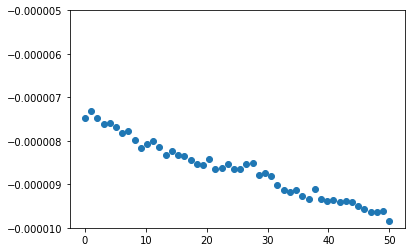

In [87]:
plt.scatter(xaxis, Vin1)
plt.ylim(-1e-5, -0.5e-5)

(-1e-06, 1e-06)

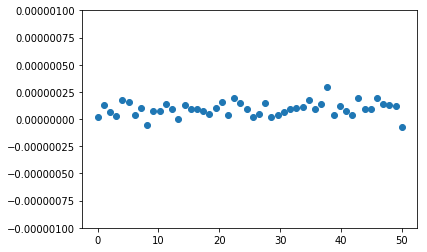

In [90]:
plt.scatter(xaxis, Vin)
plt.ylim(-1e-6, 1e-6)

In [97]:
data = pd.DataFrame({
    'V_in_1 (V)': Vin1,
    'Kerr signal_1 (rad)': Vin0/0.7/3.3,
    'V_in (V)': Vin,
    'Kerr signal (rad)': Vin/0.7/3.3})
data.to_csv('signal fluctuation with modulating field 2f')